# VIVEK BHAVSHAR 
## CSC 578 SECTION 701
## FINAL PROJECT

## Importing important libraries

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import io
import matplotlib.pyplot as plt
from keras.layers import CuDNNLSTM

Using TensorFlow backend.


In [0]:

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

## Loading File

In [0]:

from google.colab import files
uploaded = files.upload()

Saving climate_hour.csv to climate_hour.csv


In [0]:
climate1= pd.read_csv('climate_hour.csv')

## Checking file properly imported

In [0]:
climate1

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.70
1,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.30
2,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.20
3,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.00
4,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70032,31.12.2016 20:00:00,1001.47,-1.52,271.52,-7.13,65.42,5.46,3.57,1.89,2.22,3.57,1282.60,1.24,1.96,232.00
70033,31.12.2016 21:00:00,1001.29,-3.09,269.98,-7.09,73.70,4.86,3.58,1.28,2.23,3.58,1289.78,0.61,1.48,207.50
70034,31.12.2016 22:00:00,1000.70,-2.59,270.51,-7.04,71.30,5.04,3.60,1.45,2.24,3.59,1286.67,0.38,0.72,8.15
70035,31.12.2016 23:00:00,1000.21,-3.76,269.39,-7.95,72.50,4.62,3.35,1.27,2.09,3.35,1291.71,0.89,1.30,223.70


In [0]:
print("Dimensions of the data:")
print("No.of Instances/Rows : {0}".format(climate1.shape[0]))
print("No.of Attributes/Columns : {0}".format(climate1.shape[1]))

Dimensions of the data:
No.of Instances/Rows : 70037
No.of Attributes/Columns : 15


# Exploratory Analysis

In [0]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno

# Projecting Histogram for all the Attribute present to check distribution

In [0]:
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

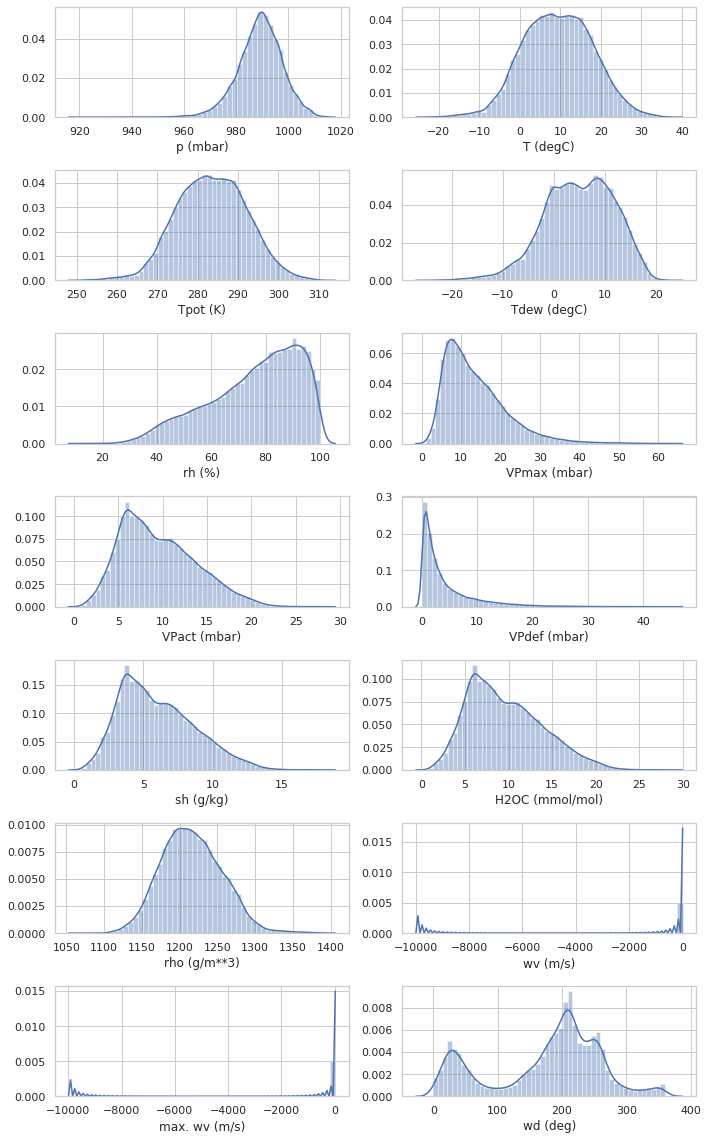

In [0]:
fig,ax = plt.subplots(7,2, figsize=(10,16))                
sns.distplot(climate1['p (mbar)'], ax = ax[0,0]) 
sns.distplot(climate1['T (degC)'], ax = ax[0,1]) 
sns.distplot(climate1['Tpot (K)'], ax = ax[1,0]) 
sns.distplot(climate1['Tdew (degC)'], ax = ax[1,1]) 
sns.distplot(climate1['rh (%)'], ax = ax[2,0]) 
sns.distplot(climate1['VPmax (mbar)'], ax = ax[2,1]) 
sns.distplot(climate1['VPact (mbar)'], ax = ax[3,0]) 
sns.distplot(climate1['VPdef (mbar)'], ax = ax[3,1]) 
sns.distplot(climate1['sh (g/kg)'], ax = ax[4,0]) 
sns.distplot(climate1['H2OC (mmol/mol)'], ax = ax[4,1])
sns.distplot(climate1['rho (g/m**3)'], ax = ax[5,0])
sns.distplot(climate1['wv (m/s)'], ax = ax[5,1])
sns.distplot(climate1['max. wv (m/s)'], ax = ax[6,0])
sns.distplot(climate1['wd (deg)'], ax = ax[6,1])

plt.tight_layout()
plt.show()  

From above plots we can say that for most of the attributes the distribution is not normal and observed skewness, also the behaviour of WV(m/s) and max.wv(m/s) was very strenge and not normal.

# Correlation Matrix of Attributes

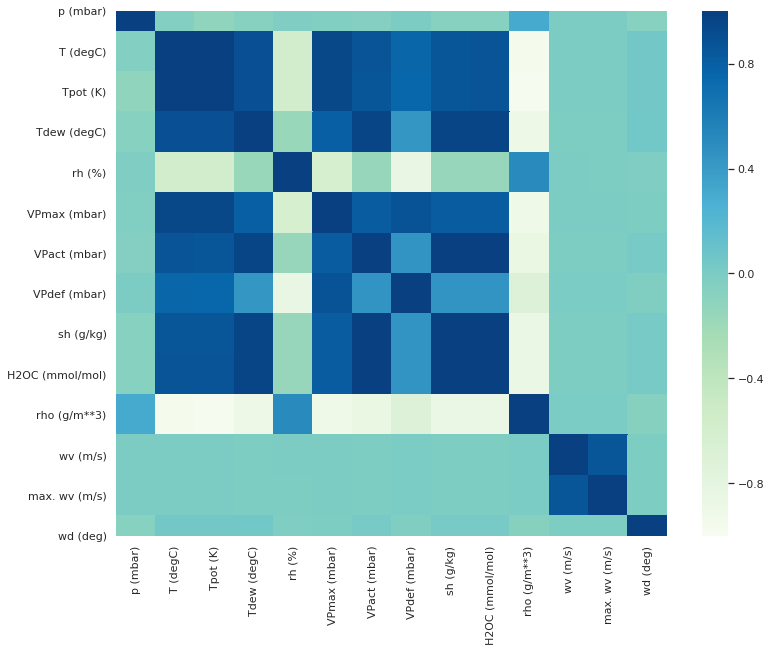

In [0]:
sns.set(rc={'figure.figsize': (11,9)})
sns.heatmap(climate1.corr(),vmin=-1.0,vmax=1.0,cmap='GnBu')

The correlation matrix explains the correlation between the attributes which help understand when we are looking for highly correlated attributes to choose from whole data set, but well in our case we are alreay moving forward with 4 selected variables.

### Box Plot for 4 selected variables

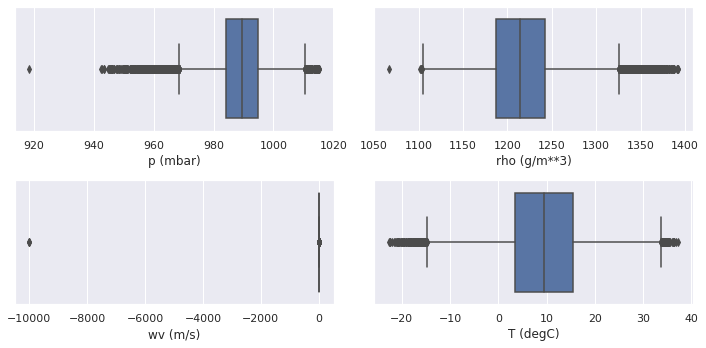

In [0]:
fig,ax = plt.subplots(2,2, figsize=(10,5))                
sns.boxplot(climate1['p (mbar)'], ax = ax[0,0]) 
sns.boxplot(climate1['rho (g/m**3)'], ax = ax[0,1]) 
sns.boxplot(climate1['wv (m/s)'], ax = ax[1,0]) 
sns.boxplot(climate1['T (degC)'], ax = ax[1,1]) 
plt.tight_layout()
plt.show()  

The box plot depicts that there are outliers but infact for us this are very valuable points as this is the seasonal dataset and all the extreme values are seasonal outliers which really helps improve the future prediction.

# Selecting 4 attributes for data frame

In [0]:
climate = climate1[['p (mbar)', 'rho (g/m**3)', 'wv (m/s)', 'T (degC)' ]]

In [0]:
climate


,p (mbar),rho (g/m**3),wv (m/s),T (degC)
0,996.50,1307.86,0.21,-8.05
1,996.62,1312.25,0.25,-8.88
2,996.84,1312.18,0.18,-8.81
3,996.99,1313.61,0.10,-9.05
4,997.46,1317.19,0.40,-9.63
...,...,...,...,...
70032,1001.47,1282.60,1.24,-1.52
70033,1001.29,1289.78,0.61,-3.09
70034,1000.70,1286.67,0.38,-2.59
70035,1000.21,1291.71,0.89,-3.76


In [0]:
climate.isnull().sum()

p (mbar)        0
rho (g/m**3)    0
wv (m/s)        0
T (degC)        0
dtype: int64

# Exploring Training Set
### Knowing that we will use 48000 instances for training, checked the distribution for the same set

In [0]:
maintrain = climate.iloc[0:48000]

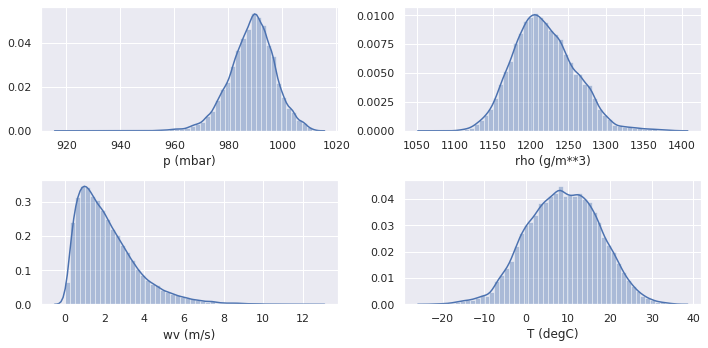

In [0]:
fig,ax = plt.subplots(2,2, figsize=(10,5))                
sns.distplot(maintrain['p (mbar)'], ax = ax[0,0]) 
sns.distplot(maintrain['rho (g/m**3)'], ax = ax[0,1])
sns.distplot(maintrain['wv (m/s)'], ax = ax[1,0])
sns.distplot(maintrain['T (degC)'], ax = ax[1,1]) 

plt.tight_layout()
plt.show()  

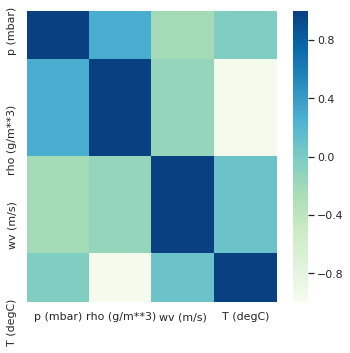

In [0]:
sns.set(rc={'figure.figsize': (5,5)})
sns.heatmap(maintrain.corr(),vmin=-1.0,vmax=1.0,cmap='GnBu')

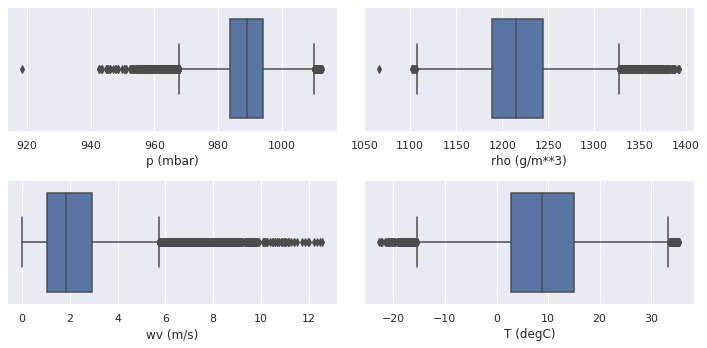

In [0]:
fig,ax = plt.subplots(2,2, figsize=(10,5))                
sns.boxplot(maintrain['p (mbar)'], ax = ax[0,0]) 
sns.boxplot(maintrain['rho (g/m**3)'], ax = ax[0,1]) 
sns.boxplot(maintrain['wv (m/s)'], ax = ax[1,0]) 
sns.boxplot(maintrain['T (degC)'], ax = ax[1,1]) 
plt.tight_layout()
plt.show()  

# Generating Y_Part

In [0]:
y_part = np.array([(climate['T (degC)'][53:])]).T
y_part

array([[-8.2 ],
       [-8.48],
       [-9.28],
       ...,
       [-2.59],
       [-3.76],
       [-4.82]])

# Splitting Y_Part into Train(48,000) and Test (21,984)

In [0]:
ytrain = y_part[0:48000]
ytrain.shape
ytrain

array([[-8.2 ],
       [-8.48],
       [-9.28],
       ...,
       [ 9.58],
       [10.01],
       [11.61]])

In [0]:
ytest = y_part[48000:69984] # not using just for our refernce.
ytest.shape
ytest # 'dividing and printing only for our reference'

array([[12.65],
       [13.54],
       [15.41],
       ...,
       [-2.59],
       [-3.76],
       [-4.82]])

# Generating X_PART: Producing 4*48=192 features

In [0]:
x_part = [] # list
for i in range(48,len(climate.iloc[:,:])): # loop for framing the data and to generate 4*48 features.
  c = climate.iloc[i-48:i,:] # frame generation
  l = []
  for index,rows in c.iterrows():
    for i in list(rows):
      l.append(i)
  x_part.append(l)
  
x_part = pd.DataFrame(x_part)

In [0]:
x_part #69989 rows 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191
0,996.50,1307.86,0.21,-8.05,996.62,1312.25,0.25,-8.88,996.84,1312.18,0.18,-8.81,996.99,1313.61,0.10,-9.05,997.46,1317.19,0.40,-9.63,997.71,1317.71,0.05,-9.67,998.33,1315.98,2.08,-9.17,999.17,1311.65,0.72,-8.10,999.69,1310.14,0.34,-7.66,1000.27,1307.76,1.45,-7.04,...,998.87,1281.64,0.47,-2.12,999.59,1285.63,2.91,-2.76,1000.21,1287.04,1.52,-2.88,1000.74,1288.58,2.97,-3.07,1001.27,1290.63,3.07,-3.34,1001.83,1291.08,2.89,-3.30,1002.23,1292.57,2.48,-3.49,1002.39,1295.46,3.06,-4.02,1002.52,1297.39,0.74,-4.38,1002.32,1298.79,1.42,-4.71
1,996.62,1312.25,0.25,-8.88,996.84,1312.18,0.18,-8.81,996.99,1313.61,0.10,-9.05,997.46,1317.19,0.40,-9.63,997.71,1317.71,0.05,-9.67,998.33,1315.98,2.08,-9.17,999.17,1311.65,0.72,-8.10,999.69,1310.14,0.34,-7.66,1000.27,1307.76,1.45,-7.04,1000.87,1310.43,1.91,-7.41,...,999.59,1285.63,2.91,-2.76,1000.21,1287.04,1.52,-2.88,1000.74,1288.58,2.97,-3.07,1001.27,1290.63,3.07,-3.34,1001.83,1291.08,2.89,-3.30,1002.23,1292.57,2.48,-3.49,1002.39,1295.46,3.06,-4.02,1002.52,1297.39,0.74,-4.38,1002.32,1298.79,1.42,-4.71,1002.39,1301.68,0.27,-5.28
2,996.84,1312.18,0.18,-8.81,996.99,1313.61,0.10,-9.05,997.46,1317.19,0.40,-9.63,997.71,1317.71,0.05,-9.67,998.33,1315.98,2.08,-9.17,999.17,1311.65,0.72,-8.10,999.69,1310.14,0.34,-7.66,1000.27,1307.76,1.45,-7.04,1000.87,1310.43,1.91,-7.41,1000.30,1306.98,1.84,-6.87,...,1000.21,1287.04,1.52,-2.88,1000.74,1288.58,2.97,-3.07,1001.27,1290.63,3.07,-3.34,1001.83,1291.08,2.89,-3.30,1002.23,1292.57,2.48,-3.49,1002.39,1295.46,3.06,-4.02,1002.52,1297.39,0.74,-4.38,1002.32,1298.79,1.42,-4.71,1002.39,1301.68,0.27,-5.28,1002.27,1306.26,0.39,-6.23
3,996.99,1313.61,0.10,-9.05,997.46,1317.19,0.40,-9.63,997.71,1317.71,0.05,-9.67,998.33,1315.98,2.08,-9.17,999.17,1311.65,0.72,-8.10,999.69,1310.14,0.34,-7.66,1000.27,1307.76,1.45,-7.04,1000.87,1310.43,1.91,-7.41,1000.30,1306.98,1.84,-6.87,1000.03,1301.73,0.57,-5.89,...,1000.74,1288.58,2.97,-3.07,1001.27,1290.63,3.07,-3.34,1001.83,1291.08,2.89,-3.30,1002.23,1292.57,2.48,-3.49,1002.39,1295.46,3.06,-4.02,1002.52,1297.39,0.74,-4.38,1002.32,1298.79,1.42,-4.71,1002.39,1301.68,0.27,-5.28,1002.27,1306.26,0.39,-6.23,1002.15,1305.61,0.43,-6.13
4,997.46,1317.19,0.40,-9.63,997.71,1317.71,0.05,-9.67,998.33,1315.98,2.08,-9.17,999.17,1311.65,0.72,-8.10,999.69,1310.14,0.34,-7.66,1000.27,1307.76,1.45,-7.04,1000.87,1310.43,1.91,-7.41,1000.30,1306.98,1.84,-6.87,1000.03,1301.73,0.57,-5.89,999.81,1301.67,1.25,-5.94,...,1001.27,1290.63,3.07,-3.34,1001.83,1291.08,2.89,-3.30,1002.23,1292.57,2.48,-3.49,1002.39,1295.46,3.06,-4.02,1002.52,1297.39,0.74,-4.38,1002.32,1298.79,1.42,-4.71,1002.39,1301.68,0.27,-5.28,1002.27,1306.26,0.39,-6.23,1002.15,1305.61,0.43,-6.13,1002.02,1305.89,0.77,-6.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69984,1012.35,1281.55,1.64,1.41,1012.46,1288.93,1.44,-0.12,1012.34,1292.32,1.26,-0.84,1012.41,1293.90,1.59,-1.15,1012.35,1297.28,2.00,-1.84,1012.38,1299.35,1.02,-2.25,1012.13,1301.52,1.91,-2.75,1011.91,1302.77,1.37,-3.06,1011.84,1303.89,1.53,-3.30,1011.72,1302.93,1.70,-3.14,...,1006.04,1306.44,1.42,-5.24,1005.53,1298.48,1.16,-3.76,1004.76,1285.09,0.86,-1.19,1003.87,1270.54,1.04,1.64,1003.24,1258.88,0.36,3.97,1003.12,1253.58,0.30,5.09,1002.63,1263.23,0.31,2.87,1002.46,1269.80,1.45,1.41,1002.27,1276.52,0.39,-0.08,1002.26,1281.06,0.82,-1.03
69985,1012.46,1288.93,1.44,-0.12,1012.34,1292.32,1.26,-0.84,1012.41,1293.90,1.59,-1.15,1012.35,1297.28,2.00,-1.84,1012.38,1299.35,1.02,-2.25,1012.13,1301.52,1.91,

# Normalizing only X-part using Standard Scaler

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_part_norm = pd.DataFrame(scaler.fit_transform(x_part))
x_part_norm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191
0,0.874078,2.299586,-0.022781,-2.079020,0.888379,2.409560,-0.022171,-2.177674,0.914656,2.407832,-0.023240,-2.169409,0.932550,2.443672,-0.024462,-2.197971,0.988762,2.533365,-0.019881,-2.266932,1.018629,2.546426,-0.025226,-2.271743,1.092796,2.503123,0.005769,-2.212388,1.193302,2.394684,-0.014996,-2.085297,1.255490,2.356865,-0.020798,-2.033045,1.324856,2.297248,-0.003850,-1.959400,...,1.155968,1.643011,-0.018813,-1.375161,1.242084,1.742987,0.018442,-1.451249,1.316240,1.778334,-0.002781,-1.465535,1.379633,1.816933,0.019359,-1.488136,1.443028,1.868302,0.020886,-1.520239,1.510015,1.879589,0.018138,-1.515498,1.557869,1.916927,0.011879,-1.538088,1.577015,1.989325,0.020735,-1.601079,1.592576,2.037687,-0.014687,-1.643873,1.568663,2.072767,-0.004305,-1.683097
1,0.888450,2.409541,-0.022171,-2.177627,0.914727,2.407807,-0.023240,-2.169357,0.932620,2.443649,-0.024461,-2.197922,0.988834,2.533341,-0.019881,-2.266881,1.018699,2.546390,-0.025225,-2.271684,1.092868,2.503093,0.005769,-2.212335,1.193375,2.394664,-0.014996,-2.085254,1.255562,2.356861,-0.020798,-2.033016,1.324931,2.297250,-0.003850,-1.959376,1.396688,2.364127,0.003173,-2.003364,...,1.242104,1.742954,0.018442,-1.451220,1.316255,1.778305,-0.002781,-1.465510,1.379644,1.816910,0.019359,-1.488116,1.443036,1.868285,0.020886,-1.520224,1.510021,1.879575,0.018138,-1.515486,1.557867,1.916913,0.011878,-1.538079,1.577009,1.989321,0.020734,-1.601077,1.592567,2.037671,-0.014688,-1.643864,1.568650,2.072757,-0.004305,-1.683093,1.577037,2.145162,-0.021864,-1.750840
2,0.914799,2.407788,-0.023239,-2.169310,0.932691,2.443624,-0.024461,-2.197871,0.988906,2.533318,-0.019881,-2.266831,1.018772,2.546366,-0.025225,-2.271634,1.092942,2.503058,0.005770,-2.212278,1.193451,2.394636,-0.014996,-2.085204,1.255637,2.356841,-0.020798,-2.032975,1.325005,2.297246,-0.003850,-1.959349,1.396766,2.364129,0.003173,-2.003340,1.328447,2.277710,0.002105,-1.939200,...,1.316276,1.778272,-0.002781,-1.465481,1.379660,1.816880,0.019358,-1.488090,1.443048,1.868260,0.020886,-1.520204,1.510029,1.879557,0.018137,-1.515470,1.557872,1.916898,0.011878,-1.538066,1.577007,1.989307,0.020734,-1.601067,1.592561,2.037667,-0.014688,-1.643862,1.568641,2.072741,-0.004306,-1.683084,1.577024,2.145151,-0.021864,-1.750836,1.562682,2.259891,-0.020031,-1.863745
3,0.932765,2.443605,-0.024461,-2.197823,0.988980,2.533292,-0.019880,-2.266778,1.018845,2.546343,-0.025225,-2.271583,1.093018,2.503034,0.005770,-2.212229,1.193529,2.394602,-0.014996,-2.085149,1.255716,2.356813,-0.020798,-2.032925,1.325084,2.297227,-0.003850,-1.959308,1.396844,2.364125,0.003174,-2.003312,1.328522,2.277712,0.002105,-1.939177,1.296123,2.146207,-0.017286,-1.822755,...,1.379681,1.816847,0.019358,-1.488061,1.443064,1.868231,0.020885,-1.520178,1.510041,1.879533,0.018137,-1.515450,1.557881,1.916880,0.011877,-1.538051,1.577013,1.989291,0.020733,-1.601055,1.592559,2.037653,-0.014689,-1.643852,1.568635,2.072736,-0.004306,-1.683082,1.577015,2.145135,-0.021864,-1.750827,1.562669,2.259880,-0.020031,-1.863741,1.548326,2.243609,-0.019421,-1.851861
4,0.989056,2.533272,-0.019880,-2.266729,1.018921,2.546317,-0.025224,-2.271530,1.093095,2.503011,0.005770,-2.212179,1.193610,2.394579,-0.014995,-2.085102,1.255797,2.356780,-0.020798,-2.032872,1.325166,2.297199,-0.003850,-1.959260,1.396926,2.364105,0.003173,-2.003270,1.328597,2.277708,0.002105,-1.939149,1.296196,2.146208,-0.017286,-1.822733,1.269784,2.144704,-0.006904,-1.828696,...,1.443086,1.868196,0.020885,-1.520148,1.510058,1.879502,0.018137,-1.515424,1.557893,1.916856,0.011877,-1.538030,1.577022,1.989273,0.020733,-1.601039,1.592565,2.037637,-0.014689,-1.643839,1.568633,2.072722,-0.004306,-1.683071,1.577009,2.145130,-0.021865,-1.750825,1.562659,2.259864,-0.020032,-1.863732,1.548313,

# Splittign X_Part into Train(48,000) and Test(21,984)

In [0]:
xtrain = x_part_norm.iloc[0:48000] #48,000 for train  + validation
xtrain

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191
0,0.874078,2.299586,-0.022781,-2.079020,0.888379,2.409560,-0.022171,-2.177674,0.914656,2.407832,-0.023240,-2.169409,0.932550,2.443672,-0.024462,-2.197971,0.988762,2.533365,-0.019881,-2.266932,1.018629,2.546426,-0.025226,-2.271743,1.092796,2.503123,0.005769,-2.212388,1.193302,2.394684,-0.014996,-2.085297,1.255490,2.356865,-0.020798,-2.033045,1.324856,2.297248,-0.003850,-1.959400,...,1.155968,1.643011,-0.018813,-1.375161,1.242084,1.742987,0.018442,-1.451249,1.316240,1.778334,-0.002781,-1.465535,1.379633,1.816933,0.019359,-1.488136,1.443028,1.868302,0.020886,-1.520239,1.510015,1.879589,0.018138,-1.515498,1.557869,1.916927,0.011879,-1.538088,1.577015,1.989325,0.020735,-1.601079,1.592576,2.037687,-0.014687,-1.643873,1.568663,2.072767,-0.004305,-1.683097
1,0.888450,2.409541,-0.022171,-2.177627,0.914727,2.407807,-0.023240,-2.169357,0.932620,2.443649,-0.024461,-2.197922,0.988834,2.533341,-0.019881,-2.266881,1.018699,2.546390,-0.025225,-2.271684,1.092868,2.503093,0.005769,-2.212335,1.193375,2.394664,-0.014996,-2.085254,1.255562,2.356861,-0.020798,-2.033016,1.324931,2.297250,-0.003850,-1.959376,1.396688,2.364127,0.003173,-2.003364,...,1.242104,1.742954,0.018442,-1.451220,1.316255,1.778305,-0.002781,-1.465510,1.379644,1.816910,0.019359,-1.488116,1.443036,1.868285,0.020886,-1.520224,1.510021,1.879575,0.018138,-1.515486,1.557867,1.916913,0.011878,-1.538079,1.577009,1.989321,0.020734,-1.601077,1.592567,2.037671,-0.014688,-1.643864,1.568650,2.072757,-0.004305,-1.683093,1.577037,2.145162,-0.021864,-1.750840
2,0.914799,2.407788,-0.023239,-2.169310,0.932691,2.443624,-0.024461,-2.197871,0.988906,2.533318,-0.019881,-2.266831,1.018772,2.546366,-0.025225,-2.271634,1.092942,2.503058,0.005770,-2.212278,1.193451,2.394636,-0.014996,-2.085204,1.255637,2.356841,-0.020798,-2.032975,1.325005,2.297246,-0.003850,-1.959349,1.396766,2.364129,0.003173,-2.003340,1.328447,2.277710,0.002105,-1.939200,...,1.316276,1.778272,-0.002781,-1.465481,1.379660,1.816880,0.019358,-1.488090,1.443048,1.868260,0.020886,-1.520204,1.510029,1.879557,0.018137,-1.515470,1.557872,1.916898,0.011878,-1.538066,1.577007,1.989307,0.020734,-1.601067,1.592561,2.037667,-0.014688,-1.643862,1.568641,2.072741,-0.004306,-1.683084,1.577024,2.145151,-0.021864,-1.750836,1.562682,2.259891,-0.020031,-1.863745
3,0.932765,2.443605,-0.024461,-2.197823,0.988980,2.533292,-0.019880,-2.266778,1.018845,2.546343,-0.025225,-2.271583,1.093018,2.503034,0.005770,-2.212229,1.193529,2.394602,-0.014996,-2.085149,1.255716,2.356813,-0.020798,-2.032925,1.325084,2.297227,-0.003850,-1.959308,1.396844,2.364125,0.003174,-2.003312,1.328522,2.277712,0.002105,-1.939177,1.296123,2.146207,-0.017286,-1.822755,...,1.379681,1.816847,0.019358,-1.488061,1.443064,1.868231,0.020885,-1.520178,1.510041,1.879533,0.018137,-1.515450,1.557881,1.916880,0.011877,-1.538051,1.577013,1.989291,0.020733,-1.601055,1.592559,2.037653,-0.014689,-1.643852,1.568635,2.072736,-0.004306,-1.683082,1.577015,2.145135,-0.021864,-1.750827,1.562669,2.259880,-0.020031,-1.863741,1.548326,2.243609,-0.019421,-1.851861
4,0.989056,2.533272,-0.019880,-2.266729,1.018921,2.546317,-0.025224,-2.271530,1.093095,2.503011,0.005770,-2.212179,1.193610,2.394579,-0.014995,-2.085102,1.255797,2.356780,-0.020798,-2.032872,1.325166,2.297199,-0.003850,-1.959260,1.396926,2.364105,0.003173,-2.003270,1.328597,2.277708,0.002105,-1.939149,1.296196,2.146208,-0.017286,-1.822733,1.269784,2.144704,-0.006904,-1.828696,...,1.443086,1.868196,0.020885,-1.520148,1.510058,1.879502,0.018137,-1.515424,1.557893,1.916856,0.011877,-1.538030,1.577022,1.989273,0.020733,-1.601039,1.592565,2.037637,-0.014689,-1.643839,1.568633,2.072722,-0.004306,-1.683071,1.577009,2.145130,-0.021865,-1.750825,1.562659,2.259864,-0.020032,-1.863732,1.548313,

In [0]:
xtest = x_part_norm.iloc[48000:69984] #21,984 for test.
xtest

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191
48000,0.315952,-0.153998,-0.019270,0.218641,0.302736,0.081446,-0.011025,-0.040361,0.330239,0.043629,-0.012857,0.008339,0.324210,-0.181042,-0.012705,0.251889,0.309800,-0.397201,-0.004918,0.484756,0.307367,-0.573788,0.003784,0.676046,0.280988,-0.799724,-0.008278,0.930317,0.245034,-0.800728,-0.006446,0.919630,0.210282,-0.969054,0.002410,1.106182,0.188703,-0.881635,-0.000033,0.993307,...,-0.376524,-0.664955,-0.003392,0.572651,-0.314319,-0.558747,-0.007667,0.483513,-0.270059,-0.529438,0.001800,0.466871,-0.177946,-0.357097,-0.004002,0.298107,-0.115741,-0.235105,-0.011025,0.173316,-0.058321,-0.144423,-0.002169,0.088932,-0.040376,-0.190011,-0.003390,0.141222,-0.020037,-0.223076,-0.010413,0.180441,-0.021231,-0.181241,-0.014840,0.134089,0.017055,-0.182743,-0.019879,0.148349
48001,0.302778,0.081442,-0.011025,-0.040351,0.330281,0.043625,-0.012857,0.008349,0.324251,-0.181044,-0.012705,0.251895,0.309840,-0.397201,-0.004918,0.484757,0.307405,-0.573786,0.003785,0.676043,0.281024,-0.799720,-0.008278,0.930309,0.245067,-0.800726,-0.006446,0.919624,0.210312,-0.969053,0.002410,1.106176,0.188732,-0.881635,-0.000033,0.993303,0.092927,-1.073004,0.002563,1.194115,...,-0.314315,-0.558750,-0.007667,0.483520,-0.270056,-0.529440,0.001799,0.466875,-0.177943,-0.357100,-0.004002,0.298112,-0.115739,-0.235107,-0.011025,0.173320,-0.058319,-0.144425,-0.002169,0.088935,-0.040376,-0.190013,-0.003390,0.141224,-0.020039,-0.223077,-0.010413,0.180441,-0.021233,-0.181243,-0.014841,0.134090,0.017051,-0.182744,-0.019879,0.148350,0.057729,-0.096069,-0.015146,0.067533
48002,0.330325,0.043621,-0.012857,0.008359,0.324293,-0.181047,-0.012704,0.251900,0.309880,-0.397201,-0.004918,0.484758,0.307445,-0.573785,0.003785,0.676041,0.281061,-0.799715,-0.008277,0.930301,0.245101,-0.800722,-0.006445,0.919616,0.210343,-0.969049,0.002410,1.106166,0.188761,-0.881634,-0.000033,0.993298,0.092951,-1.073004,0.002563,1.194109,0.022291,-1.159922,0.008670,1.280855,...,-0.270051,-0.529443,0.001799,0.466882,-0.177940,-0.357104,-0.004003,0.298118,-0.115736,-0.235111,-0.011025,0.173326,-0.058317,-0.144429,-0.002170,0.088940,-0.040375,-0.190015,-0.003391,0.141227,-0.020039,-0.223079,-0.010414,0.180444,-0.021235,-0.181244,-0.014841,0.134091,0.017048,-0.182746,-0.019879,0.148352,0.057725,-0.096071,-0.015146,0.067534,0.069692,-0.051981,-0.011634,0.027125
48003,0.324336,-0.181048,-0.012704,0.251906,0.309921,-0.397202,-0.004917,0.484759,0.307485,-0.573784,0.003785,0.676038,0.281099,-0.799712,-0.008277,0.930294,0.245137,-0.800717,-0.006445,0.919608,0.210376,-0.969044,0.002410,1.106155,0.188791,-0.881631,-0.000033,0.993290,0.092976,-1.073003,0.002563,1.194102,0.022313,-1.159922,0.008670,1.280848,-0.027992,-1.199749,0.006227,1.315313,...,-0.177934,-0.357109,-0.004003,0.298127,-0.115731,-0.235116,-0.011026,0.173333,-0.058313,-0.144433,-0.002170,0.088946,-0.040372,-0.190018,-0.003391,0.141232,-0.020038,-0.223081,-0.010414,0.180447,-0.021236,-0.181246,-0.014842,0.134093,0.017046,-0.182747,-0.019880,0.148353,0.057722,-0.096074,-0.015146,0.067536,0.069688,-0.051983,-0.011634,0.027126,0.081655,-0.038705,-0.018199,0.015240
48004,0.309964,-0.397202,-0.004917,0.484761,0.307526,-0.573783,0.003786,0.676036,0.281138,-0.799710,-0.008277,0.930287,0.245174,-0.800714,-0.006445,0.919601,0.210410,-0.969037,0.002410,1.106143,0.188823,-0.881626,-0.000033,0.993281,0.093002,-1.072999,0.002563,1.194091,0.022335,-1.159921,0.008670,1.280839,-0.027972,-1.199749,0.006227,1.315305,-0.033978,-1.021404,0.006227,1.083611,...,-0.115725,-0.235123,-0.011026,0.173343,-0.058308,-0.144440,-0.002170,0.088955,-0.040369,-0.190023,-0.003391,0.141238,-0.020035,-0.223084,-0.010415,0.180450,-0.021234,-0.181248,-0.014842,0.134097,0.017046,-0.182749,-0.019880,0.148355,0.057720,-0.096

# Splitting xtrain into train and validation using 80%-20% ration of splitting

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(xtrain,ytrain,train_size=0.8)

## Reshape for Keras Acceptable Form

In [0]:
x_train_keras = np.array(x_train).reshape(x_train.shape[0],48,4)
x_valid_keras = np.array(x_valid).reshape(x_valid.shape[0],48,4)
print("Dimensions of the Data after reshaping it to Keras Acceptable form:")
print(x_train_keras.shape)
print(x_valid_keras.shape)

Dimensions of the Data after reshaping it to Keras Acceptable form:
(38400, 48, 4)
(9600, 48, 4)


In [0]:
x_test_keras = np.array(xtest).reshape(xtest.shape[0],48,4)

In [0]:
x_test_keras.shape

(21984, 48, 4)

### Indexing for Y-test dates

In [0]:
b = climate1[['Date Time']]

In [0]:
final = b.iloc[48053:70037]

## Function for Plotting Loss of Model

In [0]:
# function for plotting difference between training and validation model loss
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Training and Validation model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

# Building Model 1 (Initial Model)

In [0]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, SimpleRNN
from keras.layers import Dense, Dropout, Activation, Flatten
from keras import optimizers

data_dim = 4
timesteps = 48
model = Sequential()
model.add(CuDNNLSTM(125, return_sequences=True, input_shape=(timesteps, data_dim)))
model.add(Dropout(0.45))
model.add(CuDNNLSTM(120, return_sequences=True))
model.add(Dropout(0.5))
model.add(CuDNNLSTM(75,return_sequences=True)) 
model.add(Dropout(0.5))
model.add(CuDNNLSTM(128))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_5 (CuDNNLSTM)     (None, 48, 125)           65500     
_________________________________________________________________
dropout_4 (Dropout)          (None, 48, 125)           0         
_________________________________________________________________
cu_dnnlstm_6 (CuDNNLSTM)     (None, 48, 120)           118560    
_________________________________________________________________
dropout_5 (Dropout)          (None, 48, 120)           0         
_________________________________________________________________
cu_dnnlstm_7 (CuDNNLSTM)     (None, 48, 75)            59100     
_________________________________________________________________
dropout_6 (Dropout)          (None, 48, 75)            0         
_________________________________________________________________
cu_dnnlstm_8 (CuDNNLSTM)     (None, 128)              

In [0]:
adam = optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='mean_squared_error',optimizer=adam,metrics=['mae'])

LSTM_history = model.fit(x_train_keras, y_train, epochs=70, batch_size=200, 
                    validation_data=(x_valid_keras, y_valid), verbose=2, shuffle=False)

Train on 38400 samples, validate on 9600 samples
Epoch 1/70
 - 15s - loss: 29.4894 - mean_absolute_error: 3.9271 - val_loss: 12.2185 - val_mean_absolute_error: 2.6488
Epoch 2/70
 - 13s - loss: 10.3316 - mean_absolute_error: 2.4714 - val_loss: 9.4273 - val_mean_absolute_error: 2.3610
Epoch 3/70
 - 13s - loss: 8.9321 - mean_absolute_error: 2.3264 - val_loss: 8.6636 - val_mean_absolute_error: 2.2763
Epoch 4/70
 - 13s - loss: 8.1358 - mean_absolute_error: 2.2270 - val_loss: 7.7921 - val_mean_absolute_error: 2.1629
Epoch 5/70
 - 13s - loss: 7.4167 - mean_absolute_error: 2.1273 - val_loss: 7.1594 - val_mean_absolute_error: 2.0756
Epoch 6/70
 - 13s - loss: 6.7620 - mean_absolute_error: 2.0305 - val_loss: 6.5804 - val_mean_absolute_error: 1.9846
Epoch 7/70
 - 13s - loss: 6.3315 - mean_absolute_error: 1.9645 - val_loss: 6.0409 - val_mean_absolute_error: 1.9002
Epoch 8/70
 - 13s - loss: 6.1028 - mean_absolute_error: 1.9238 - val_loss: 6.0008 - val_mean_absolute_error: 1.8877
Epoch 9/70
 - 13s - 

### *Loss plot*

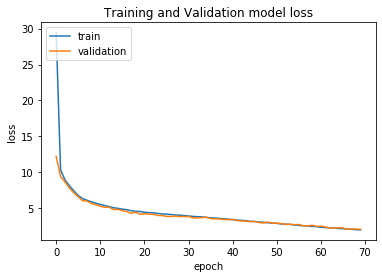

In [0]:
plotLosses(LSTM_history)

In [0]:
prediction = model.predict(x_test_keras)
prediction.shape

(21984, 1)

In [0]:
predicted = pd.DataFrame(prediction, columns={'temperature'})
predicted.index = final
def tup_str(ex):
  new_ex=ex[0]
  return new_ex
predicted.index = predicted.index.map(tup_str)
predicted.index = pd.to_datetime(predicted.index, format = '%d.%m.%Y %H:%M:%S').strftime('%d.%m.%Y_%H:%M:%S')
predicted.index.name = 'date_time'
predicted.to_csv('test3.csv')

This model gave me score of 1.84103 on kaggle, here I used mutiple layers with drop out.

## Model 2 (Simple Is Better)

In [0]:
adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6, amsgrad=False)
rms = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=1e-6)

model = Sequential()

model.add(CuDNNLSTM(100, input_shape=(timesteps, data_dim)))

model.add(Dense(1))

model.compile(loss='mae', optimizer= rms)

model.summary()

history = model.fit(x_train_keras, y_train, epochs=30, batch_size=70, 
                    validation_data=(x_valid_keras, y_valid), verbose=2, shuffle=False)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_13 (CuDNNLSTM)    (None, 100)               42400     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 42,501
Trainable params: 42,501
Non-trainable params: 0
_________________________________________________________________
Train on 38400 samples, validate on 9600 samples
Epoch 1/30
 - 9s - loss: 3.1903 - val_loss: 2.3547
Epoch 2/30
 - 8s - loss: 2.1591 - val_loss: 2.0542
Epoch 3/30
 - 8s - loss: 1.8964 - val_loss: 1.8004
Epoch 4/30
 - 8s - loss: 1.7887 - val_loss: 1.8501
Epoch 5/30
 - 8s - loss: 1.7181 - val_loss: 1.7164
Epoch 6/30
 - 8s - loss: 1.6731 - val_loss: 1.7105
Epoch 7/30
 - 7s - loss: 1.6323 - val_loss: 1.6459
Epoch 8/30
 - 7s - loss: 1.5974 - val_loss: 1.6555
Epoch 9/30
 - 8s - loss: 1.5736 - val_loss: 1.5765
Epoc

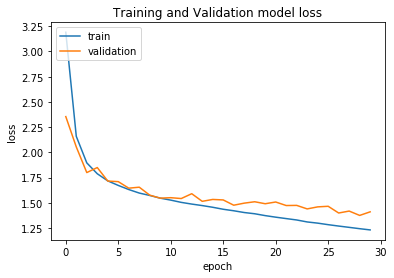

In [0]:
plotLosses(history)

In [0]:
prediction = model.predict(x_test_keras)
prediction.shape

(21984, 1)

In [0]:
predicted = pd.DataFrame(prediction, columns={'temperature'})
predicted.index = final
def tup_str(ex):
  new_ex=ex[0]
  return new_ex
predicted.index = predicted.index.map(tup_str)
predicted.index = pd.to_datetime(predicted.index, format = '%d.%m.%Y %H:%M:%S').strftime('%d.%m.%Y_%H:%M:%S')
predicted.index.name = 'date_time'
predicted.to_csv('test4.csv')

I chose to make this model less complex than the Model 1 to see Is that making any change in the prediction and infact it did prefromed well and got improved score of 1.69081. Stating that Simple is Better than Complex. I also tweaked Epoch and Batchsize as well.

# Model 3 (STATEFULNES and BATCHSIZE)

In [0]:
adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6, amsgrad=False)
rms = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=1e-6)
batch_size=32
model = Sequential()

model.add(CuDNNLSTM(45, stateful=True, return_sequences=True, batch_input_shape=(batch_size, timesteps, data_dim)))
model.add(CuDNNLSTM(35, stateful=True, return_sequences=True))
model.add(CuDNNLSTM(25, stateful=True))

model.add(Dense(1, activation='linear'))

model.compile(loss='mae', optimizer= 'RMSprop')

model.summary()

history3 = model.fit(x_train_keras, y_train, epochs=30, batch_size=32, 
                    validation_data=(x_valid_keras, y_valid), shuffle=False)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_21 (CuDNNLSTM)    (32, 48, 45)              9180      
_________________________________________________________________
cu_dnnlstm_22 (CuDNNLSTM)    (32, 48, 35)              11480     
_________________________________________________________________
cu_dnnlstm_23 (CuDNNLSTM)    (32, 25)                  6200      
_________________________________________________________________
dense_7 (Dense)              (32, 1)                   26        
Total params: 26,886
Trainable params: 26,886
Non-trainable params: 0
_________________________________________________________________
Train on 38400 samples, validate on 9600 samples
Epoch 1/30
38400/38400 [==============================] - 41s 1ms/step - loss: 3.2049 - val_loss: 2.1398
Epoch 2/30
38400/38400 [==============================] - 40s 1ms/step - loss: 2.0100 - val_lo

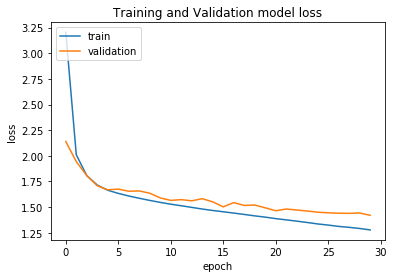

In [0]:
plotLosses(history3)

In [0]:
prediction = model.predict(x_test_keras, batch_size= 32)
prediction.shape

(21984, 1)

In [0]:
predicted = pd.DataFrame(prediction, columns={'temperature'})
predicted.index = final
def tup_str(ex):
  new_ex=ex[0]
  return new_ex
predicted.index = predicted.index.map(tup_str)
predicted.index = pd.to_datetime(predicted.index, format = '%d.%m.%Y %H:%M:%S').strftime('%d.%m.%Y_%H:%M:%S')
predicted.index.name = 'date_time'
predicted.to_csv('test6.csv')

In this Model I tried one of the advanced feature of STATEFULNES and BATCHSIZE to further check the difference and Infact it slightly improved my previous Score.I achieved score of 1.64908 with this model.

## Model 4 (Recurrent DropOut)

In [0]:
adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6, amsgrad=False)
rms = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=1e-6)
batch_size=100
model = Sequential()

model.add(LSTM(128, return_sequences=True, input_shape=(timesteps, data_dim)))
model.add(LSTM(100, recurrent_dropout = 0.5))

model.add(Dense(1))

model.compile(loss='mae', optimizer= 'RMSprop')

model.summary()

history4 = model.fit(x_train_keras, y_train, epochs=25, batch_size=100, 
                    validation_data=(x_valid_keras, y_valid), shuffle=False)

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (100, 48, 45)             9000      
_________________________________________________________________
lstm_15 (LSTM)               (100, 25)                 7100      
_________________________________________________________________
dense_19 (Dense)             (100, 1)                  26        
Total params: 16,126
Trainable params: 16,126
Non-trainable params: 0
_________________________________________________________________
Train on 38400 samples, validate on 9600 samples
Epoch 1/25
38400/38400 [==============================] - 81s 2ms/step - loss: 4.9141 - val_loss: 3.4300
Epoch 2/25
38400/38400 [==============================] - 77s 2ms/step - loss: 2.9047 - val_loss: 2.4613
Epoch 3/25
38400/38400 [==============================] - 77s 2ms/step - loss: 2.1582 - val_loss: 2.1100
Epoch 4/25
3840

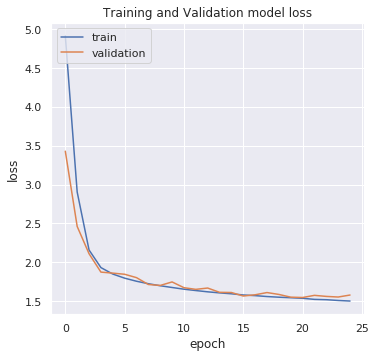

In [0]:
plotLosses(history4)

In [0]:
predicted = pd.DataFrame(prediction, columns={'temperature'})
predicted.index = final
def tup_str(ex):
  new_ex=ex[0]
  return new_ex
predicted.index = predicted.index.map(tup_str)
predicted.index = pd.to_datetime(predicted.index, format = '%d.%m.%Y %H:%M:%S').strftime('%d.%m.%Y_%H:%M:%S')
predicted.index.name = 'date_time'
predicted.to_csv('test7.csv')

Recurrent dropout did no really improved the existing score but also did not do bad. it maintained the previous score.

# Model 5 (Model 2 with different Batchsize and EPOCH)

In [0]:
adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6, amsgrad=False)
rms = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=1e-6)

model = Sequential()

model.add(CuDNNLSTM(256, input_shape=(timesteps, data_dim)))

model.add(Dense(1))

model.compile(loss='mae', optimizer= rms)

model.summary()

history9 = model.fit(x_train_keras, y_train, epochs=100, batch_size=500, 
                    validation_data=(x_valid_keras, y_valid), verbose=2, shuffle=False)

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_25 (CuDNNLSTM)    (None, 256)               268288    
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 257       
Total params: 268,545
Trainable params: 268,545
Non-trainable params: 0
_________________________________________________________________
Train on 38400 samples, validate on 9600 samples
Epoch 1/100
 - 7s - loss: 4.5159 - val_loss: 3.2889
Epoch 2/100
 - 3s - loss: 3.3254 - val_loss: 3.1256
Epoch 3/100
 - 3s - loss: 2.9925 - val_loss: 2.8391
Epoch 4/100
 - 3s - loss: 2.6542 - val_loss: 2.5163
Epoch 5/100
 - 3s - loss: 2.3783 - val_loss: 2.4262
Epoch 6/100
 - 3s - loss: 2.2333 - val_loss: 2.5423
Epoch 7/100
 - 4s - loss: 2.0987 - val_loss: 2.0663
Epoch 8/100
 - 3s - loss: 2.0059 - val_loss: 1.9594
Epoch 9/100
 - 3s - loss: 1.9184 - val_loss:

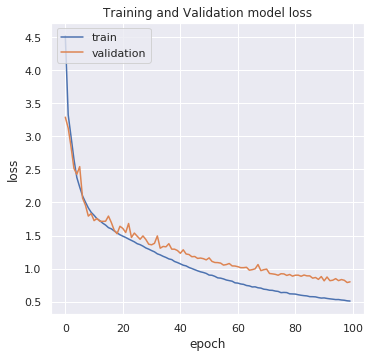

In [0]:
plotLosses(history9)

In [0]:
predicted = pd.DataFrame(prediction, columns={'temperature'})
predicted.index = final
def tup_str(ex):
  new_ex=ex[0]
  return new_ex
predicted.index = predicted.index.map(tup_str)
predicted.index = pd.to_datetime(predicted.index, format = '%d.%m.%Y %H:%M:%S').strftime('%d.%m.%Y_%H:%M:%S')
predicted.index.name = 'date_time'
predicted.to_csv('test9.csv')

Even this model did not improved the existing score.

# Model 6 (Model 2 with different epoch and batch size)

In [0]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.layers import Dense, Dropout, Activation, Flatten
from keras import optimizers

adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6, amsgrad=False)
rms = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
data_dim = 4
timesteps = 48
model = Sequential()

model.add(CuDNNLSTM(158, input_shape=(timesteps, data_dim)))

model.add(Dense(1))

model.compile(loss='mae', optimizer= rms)

model.summary()

history9 = model.fit(x_train_keras, y_train, epochs=50, batch_size=200, 
                    validation_data=(x_valid_keras, y_valid), verbose=2, shuffle=False)





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_1 (CuDNNLSTM)     (None, 158)               103648    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 159       
Total params: 103,807
Trainable params: 103,807
Non-trainable params: 0
_________________________________________________________________



Train on 38400 samples, validate on 9600 samples
Epoch 1/50





 - 11s - loss: 3.7113 - val_loss: 3.2548
Epoch 2/50
 - 3s - loss: 2.6654 - val_loss: 2.5625
Epoch 3/50
 - 3s - loss: 2.2341 - val_loss: 1.9877
Epoch 4/50
 - 3s - loss: 2.0330 - val_loss: 2.0134
Epoch 5/50
 - 3s - loss: 1.8915 - val_loss: 1.7948
Epoch 6/50
 - 3s - loss: 1.8073 - val_loss: 1.7274
Epoch 7/50
 - 3s - loss: 1.7532 - val_loss: 1.6613
Epoch 8/50
 - 4s - loss: 1.7024 - val_loss: 1.6405
Epoch 9/50
 - 3s - loss: 1.6617 - val_lo

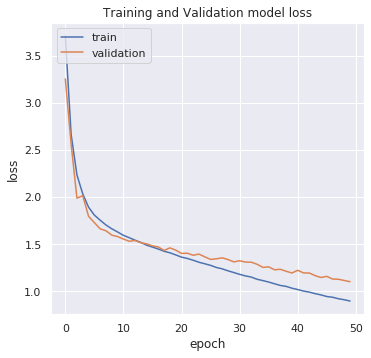

In [0]:
plotLosses(history9)

In [0]:
prediction = model.predict(x_test_keras)
prediction.shape

(21984, 1)

In [0]:
predicted = pd.DataFrame(prediction, columns={'temperature'})
predicted.index = final
def tup_str(ex):
  new_ex=ex[0]
  return new_ex
predicted.index = predicted.index.map(tup_str)
predicted.index = pd.to_datetime(predicted.index, format = '%d.%m.%Y %H:%M:%S').strftime('%d.%m.%Y_%H:%M:%S')
predicted.index.name = 'date_time'
predicted.to_csv('test10.csv')

This model infact performed worst and gave score of 1.82950.

# Model 7 (STATEFULNES and BATCHSIZE and dropout)


In [0]:
adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6, amsgrad=False)
rms = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=1e-6)
batch_size=32
model = Sequential()

model.add(CuDNNLSTM(128, stateful=True, return_sequences=True, batch_input_shape=(batch_size, timesteps, data_dim)))
model.add(Dropout(0.55))
model.add(CuDNNLSTM(60, stateful=True, return_sequences=True))
model.add(CuDNNLSTM(100, stateful=True))

model.add(Dense(1))

model.compile(loss='mae', optimizer= rms)

model.summary()

history30 = model.fit(x_train_keras, y_train, epochs=20, batch_size=32, 
                    validation_data=(x_valid_keras, y_valid), shuffle=False)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_16 (CuDNNLSTM)    (32, 48, 128)             68608     
_________________________________________________________________
dropout_4 (Dropout)          (32, 48, 128)             0         
_________________________________________________________________
cu_dnnlstm_17 (CuDNNLSTM)    (32, 48, 60)              45600     
_________________________________________________________________
cu_dnnlstm_18 (CuDNNLSTM)    (32, 100)                 64800     
_________________________________________________________________
dense_10 (Dense)             (32, 1)                   101       
Total params: 179,109
Trainable params: 179,109
Non-trainable params: 0
_________________________________________________________________
Train on 38400 samples, validate on 9600 samples
Epoch 1/20
38400/38400 [==============================] - 53s 1m

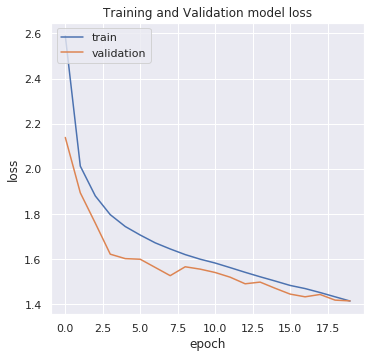

In [0]:
plotLosses(history30) # original one

In [0]:
prediction = model.predict(x_test_keras)
prediction.shape

(21984, 1)

In [0]:
predicted = pd.DataFrame(prediction, columns={'temperature'})
predicted.index = final
def tup_str(ex):
  new_ex=ex[0]
  return new_ex
predicted.index = predicted.index.map(tup_str)
predicted.index = pd.to_datetime(predicted.index, format = '%d.%m.%Y %H:%M:%S').strftime('%d.%m.%Y_%H:%M:%S')
predicted.index.name = 'date_time'
predicted.to_csv('test11.csv')

The Combination of statefulness, Dropout and Batch size indeed improved my existing score to 1.62519.

# Model 8 - Simple LSTM with more Epoch and Batch Size

In [0]:
adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6, amsgrad=False)
rms = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=1e-6)
model = Sequential()

model.add(CuDNNLSTM(200, input_shape=(timesteps, data_dim)))

model.add(Dense(1))

model.compile(loss='mae', optimizer= adam)

model.summary()

history31 = model.fit(x_train_keras, y_train, epochs=100, batch_size=200, 
                    validation_data=(x_valid_keras, y_valid), shuffle=False)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_14 (CuDNNLSTM)    (None, 200)               164800    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 201       
Total params: 165,001
Trainable params: 165,001
Non-trainable params: 0
_________________________________________________________________
Train on 38400 samples, validate on 9600 samples
Epoch 1/100
38400/38400 [==============================] - 6s 149us/step - loss: 5.6806 - val_loss: 3.4216
Epoch 2/100
38400/38400 [==============================] - 5s 121us/step - loss: 3.1166 - val_loss: 2.7563
Epoch 3/100
38400/38400 [==============================] - 5s 120us/step - loss: 2.6519 - val_loss: 2.4809
Epoch 4/100
38400/38400 [==============================] - 5s 122us/step - loss: 2.4421 - val_loss: 2.3575
Epoch 5/100
38400/38400 [========

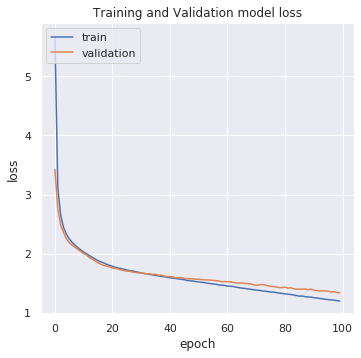

In [0]:
prediction = model.predict(x_test_keras)
prediction.shape
predicted = pd.DataFrame(prediction, columns={'temperature'})
predicted.index = final
def tup_str(ex):
  new_ex=ex[0]
  return new_ex
predicted.index = predicted.index.map(tup_str)
predicted.index = pd.to_datetime(predicted.index, format = '%d.%m.%Y %H:%M:%S').strftime('%d.%m.%Y_%H:%M:%S')
predicted.index.name = 'date_time'
predicted.to_csv('test12.csv')
plotLosses(history31)

For further analysis of simple model to see th ebig picture I ran more epoch with appropriate batch size but it did not make any drastic difference.

# Model 9 - simple LSTM 500 epoch 

In [0]:
adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6, amsgrad=False)
rms = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=1e-6)
model = Sequential()

model.add(CuDNNLSTM(256, input_shape=(timesteps, data_dim)))

model.add(Dense(1))

model.compile(loss='mae', optimizer= adam)

model.summary()

history32 = model.fit(x_train_keras, y_train, epochs=500, batch_size=300, 
                    validation_data=(x_valid_keras, y_valid), shuffle=False)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_15 (CuDNNLSTM)    (None, 256)               268288    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 257       
Total params: 268,545
Trainable params: 268,545
Non-trainable params: 0
_________________________________________________________________
Train on 38400 samples, validate on 9600 samples
Epoch 1/500
38400/38400 [==============================] - 5s 140us/step - loss: 6.2980 - val_loss: 3.5916
Epoch 2/500
38400/38400 [==============================] - 4s 112us/step - loss: 3.2977 - val_loss: 2.9859
Epoch 3/500
38400/38400 [==============================] - 4s 111us/step - loss: 2.7668 - val_loss: 2.5772
Epoch 4/500
38400/38400 [==============================] - 4s 111us/step - loss: 2.5039 - val_loss: 2.4004
Epoch 5/500
38400/38400 [========

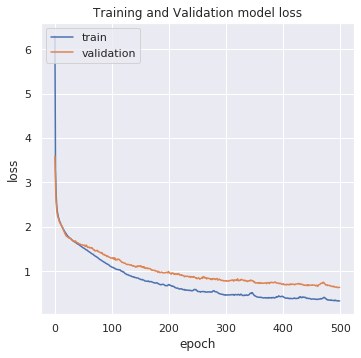

In [0]:
prediction = model.predict(x_test_keras)
prediction.shape
predicted = pd.DataFrame(prediction, columns={'temperature'})
predicted.index = final
def tup_str(ex):
  new_ex=ex[0]
  return new_ex
predicted.index = predicted.index.map(tup_str)
predicted.index = pd.to_datetime(predicted.index, format = '%d.%m.%Y %H:%M:%S').strftime('%d.%m.%Y_%H:%M:%S')
predicted.index.name = 'date_time'
predicted.to_csv('test13.csv')
plotLosses(history32)

This model was ran to see how model performs over 500 epochs but it turned out to be worst as we can seein the graph above over the epochs the difference between train and validation is keep increasing and it gave score aroung 2.16.

# Model 10 (Model 7 with different parameters)

In [0]:
adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6, amsgrad=False)
rms = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=1e-6)
batch_size=32
model = Sequential()

model.add(CuDNNLSTM(128, stateful=True, return_sequences=True, batch_input_shape=(batch_size, timesteps, data_dim)))
model.add(Dropout(0.5))
model.add(CuDNNLSTM(60, stateful=True, return_sequences=True))
model.add(CuDNNLSTM(100, stateful=True))

model.add(Dense(1))

model.compile(loss='mae', optimizer= rms)

model.summary()

history46 = model.fit(x_train_keras, y_train, epochs=35, batch_size=32, 
                    validation_data=(x_valid_keras, y_valid), shuffle=False)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_22 (CuDNNLSTM)    (32, 48, 128)             68608     
_________________________________________________________________
dropout_7 (Dropout)          (32, 48, 128)             0         
_________________________________________________________________
cu_dnnlstm_23 (CuDNNLSTM)    (32, 48, 60)              45600     
_________________________________________________________________
cu_dnnlstm_24 (CuDNNLSTM)    (32, 100)                 64800     
_________________________________________________________________
dense_12 (Dense)             (32, 1)                   101       
Total params: 179,109
Trainable params: 179,109
Non-trainable params: 0
_________________________________________________________________
Train on 38400 samples, validate on 9600 samples
Epoch 1/35
38400/38400 [==============================] - 53s 1m

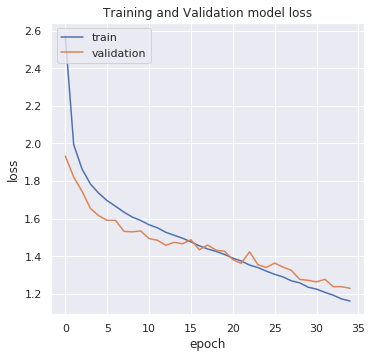

In [0]:
prediction = model.predict(x_test_keras)
prediction.shape
predicted = pd.DataFrame(prediction, columns={'temperature'})
predicted.index = final
def tup_str(ex):
  new_ex=ex[0]
  return new_ex
predicted.index = predicted.index.map(tup_str)
predicted.index = pd.to_datetime(predicted.index, format = '%d.%m.%Y %H:%M:%S').strftime('%d.%m.%Y_%H:%M:%S')
predicted.index.name = 'date_time'
predicted.to_csv('test16.csv')
plotLosses(history46)

To furthure improve the score of model 7 I tweaked the parmater such as diffrence epoch and drpout but did not improve the score as expected.

# Model 12 - SimpleRNN

In [0]:
timesteps = 48
data_dim = 4
rnn_model = Sequential()

rnn_model.add(SimpleRNN(100,activation="relu",return_sequences=True, input_shape=(timesteps, data_dim)))
model.add(Dropout(0.5))
rnn_model.add(SimpleRNN(50,return_sequences=False))

rnn_model.add(Dense(1))

rnn_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_10 (SimpleRNN)    (None, 48, 100)           10500     
_________________________________________________________________
simple_rnn_11 (SimpleRNN)    (None, 50)                7550      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total params: 18,101
Trainable params: 18,101
Non-trainable params: 0
_________________________________________________________________


In [45]:
rms = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=1e-6)
rnn_model.compile(loss='mae', optimizer= rms)
rnn = rnn_model.fit(x_train_keras, y_train, epochs=25, batch_size=100, 
                    validation_data=(x_valid_keras, y_valid), shuffle=False)


Train on 38400 samples, validate on 9600 samples
Epoch 1/25
38400/38400 [==============================] - 32s 840us/step - loss: 3.4137 - val_loss: 2.4350
Epoch 2/25
38400/38400 [==============================] - 32s 825us/step - loss: 2.0384 - val_loss: 2.0812
Epoch 3/25
38400/38400 [==============================] - 32s 825us/step - loss: 1.8537 - val_loss: 1.8714
Epoch 4/25
38400/38400 [==============================] - 32s 826us/step - loss: 1.7804 - val_loss: 1.8504
Epoch 5/25
38400/38400 [==============================] - 32s 831us/step - loss: 1.7413 - val_loss: 1.7205
Epoch 6/25
38400/38400 [==============================] - 31s 819us/step - loss: 1.7000 - val_loss: 1.7770
Epoch 7/25
38400/38400 [==============================] - 32s 841us/step - loss: 1.6797 - val_loss: 1.8143
Epoch 8/25
38400/38400 [==============================] - 32s 838us/step - loss: 1.6577 - val_loss: 1.6847
Epoch 9/25
38400/38400 [==============================] - 33s 858us/step - loss: 1.6405 - val_l

In [46]:
prediction = rnn_model.predict(x_test_keras)
prediction.shape

(21984, 1)

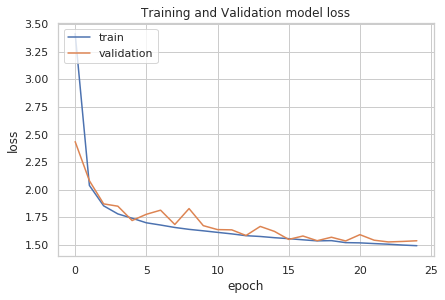

In [47]:
predicted = pd.DataFrame(prediction, columns={'temperature'})
predicted.index = final
def tup_str(ex):
  new_ex=ex[0]
  return new_ex
predicted.index = predicted.index.map(tup_str)
predicted.index = pd.to_datetime(predicted.index, format = '%d.%m.%Y %H:%M:%S').strftime('%d.%m.%Y_%H:%M:%S')
predicted.index.name = 'date_time'
predicted.to_csv('test21.csv')
plotLosses(rnn)

As a part of learnig and suggested by prof to try further models, I also tried to implement simple RNN  on the same data and infatcit gave me the best score of all which was about 1.62450. Furthermore, I also tried to twaek the parameter for the same model but It did not worked well for the given dataset.

In a Nutshell, I can say that sometimes simpler model works best than complex models as the main aspect is get the optimal result and less loss for all given scenarios.